# BLU04 - Learning Notebook - Part 1 of 3 - Pandas for Timeseries

## A bit of housekeeping before we get started

Welcome to timeseries! 

Here we will learn how to explore datasets that  depend on time. As you might imagine, many datasets in the real world are timeseries. The stock market springs to mind, but also anything to do with sales or marketing, engineering processes (when will this particular turbine break, you may ask?), medical processes (what is the effect of this medication over time), and so many, many more. 

Now, timeseries are a less settled field than most things you've learned so far. There are many ways of doing things, and different schools of thought fighting to get _"followers"_. Our objective here is to avoid indoctrination, but rather to give you a bit of exposure to the super-basics of how to handle timeseries data, and making some basic but useful predictions. We will in no way try to teach you everything, but rather enough to get your hands dirty. From then on, there is the good old fashioned documentation and hacking around. 

Speaking of covering only the basics, as you might know, Neural Networks are becoming increasingly prevalent in the prediction of timeseries. While this is a very exciting topic, we've decided not to include Neural Networks in the Academy, for three main reasons:
1. We want to make sure you gain a solid technical base, on which you can then later add NNs, rather than have you "run before you can walk" 
2. Teaching NNs is slow, as to be understood correctly there are a lot of tricks and "best practice" things to know, which don't necessarily have the most scientific of basis (it's still mostly an empirical field), so they do not fit well into the "basic intuition followed by practice" approach of the Academy 
3. There are already EXCELLENT resources to learn NNs, namely [Andrew NGs course on Coursera](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwjVmcT5wtbaAhXHuRQKHc2yD2wQFggpMAA&url=https%3A%2F%2Fwww.coursera.org%2Fspecializations%2Fdeep-learning&usg=AOvVaw3vIqYhrM-dZQd6HUBci4QA), which are best approached after a solid technical foundation has been laid. 

Lastly, remember that timeseries are notoriously tricky to evaluate. While with "static" data we can trust a few metrics and for the most part be done with it (yay _roc auc_ !), in timeseries the metrics tend to be more problem-specific. The thing to remember is: your problems will be extra sneaky, and you will have to be extra careful. As a corollary to this, when you think you've predicted the stock market... you probably haven't. 

And now, let the fun begin! 

## Pandas for Timeseries 

In this BLU we will not learn any fancy prediction stuff, but rather how to wrangle timeseries data. 

Imports: 

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
import utils
import matplotlib 


np.random.seed(1000)
%matplotlib inline 
plt.rcParams['figure.figsize'] = [16, 4]

### Timestamps 

The timestamp is the most basic form of time series indexer that Pandas has. It does exactly what the name describes: marks the exact moment in which the data was collected. 

While Kaggle datasets and other online challenges are normally clean "hourly" or "daily" datasets, TimeStamps are how most data is normally collected in the wild! 

An event happens, and the time of the event is dumped into a database. 

One example of this would be... bitcoin! Now, whatever you may think about bitcoin, ( _whether it is a Ponzi scheme or a perfectly legitimate way to destroy the environment while helping organ traffickers and kidnappers launder money_ ), it is an excellent source of high-granularity data. Let's dive in! 

In [2]:
data = pd.read_csv('data/bitcoin.csv')

Let's take a look:

In [3]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2017-01-01 00:00:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
1,2017-01-01 00:01:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2,2017-01-01 00:02:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
3,2017-01-01 00:03:00,973.36,973.36,973.36,973.36,0.040000,38.934400,973.360000
4,2017-01-01 00:04:00,973.36,973.40,973.36,973.39,5.458800,5313.529708,973.387871


In [4]:
data.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
647996,2018-03-26 23:56:00,8155.00,8155.00,8154.99,8154.99,0.617945,5039.342643,8154.997667
647997,2018-03-26 23:57:00,8154.99,8154.99,8154.00,8154.01,40.655410,331543.193980,8154.958865
647998,2018-03-26 23:58:00,8154.00,8154.01,8150.00,8150.00,9.856911,80340.432933,8150.670628
647999,2018-03-26 23:59:00,8150.01,8150.01,8122.82,8145.00,68.274269,555026.852280,8129.370847
648000,2018-03-27 00:00:00,8144.99,8145.01,8140.00,8140.00,37.842674,308202.442620,8144.309384


Interesting. We have this `Timestamp` column, that we can kind of parse by looking at it. 

In [5]:
data.Timestamp.head()

0    2017-01-01 00:00:00
1    2017-01-01 00:01:00
2    2017-01-01 00:02:00
3    2017-01-01 00:03:00
4    2017-01-01 00:04:00
Name: Timestamp, dtype: object

We can kind of understand this. Looks like Year, month, and day, then hours, minutes, then seconds. But the dtype is just object, how boring.

However, the pandas method to_datetime  can do something pretty amazing with these objects: 

In [6]:
time_as_a_timestamp = pd.to_datetime(data.Timestamp, infer_datetime_format=True)

What is it now? 

In [7]:
time_as_a_timestamp.head(2)

0   2017-01-01 00:00:00
1   2017-01-01 00:01:00
Name: Timestamp, dtype: datetime64[ns]

In [8]:
time_as_a_timestamp.min()

Timestamp('2017-01-01 00:00:00')

In [9]:
time_as_a_timestamp.max()

Timestamp('2018-03-27 00:00:00')

It is a `datetime64[ns]`, which I shall for the sake of simplicity just refer to as a TimeStamp. 

What can we do with this? Well, for one thing, extracting days, months etc is trivial:

In [10]:
time_as_a_timestamp.dt.day.head(2)

0    1
1    1
Name: Timestamp, dtype: int64

Notice the nomenclature. `Series.dt.<whatever I want>`. 

And we can want [just about anything we can think of!](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components)

In [11]:
# I'll make a little dataset so that we can see some of the results side by side
new = pd.DataFrame()
new['date'] = time_as_a_timestamp
new['day'] = new['date'].dt.day
new['month'] = new['date'].dt.month
new['year'] = new['date'].dt.year
new['hour'] = new['date'].dt.hour
new['minute'] = new['date'].dt.minute
new['second'] = new['date'].dt.second
new['day of the week'] = new['date'].dt.weekday
new['day of the week name'] = new['date'].dt.day_name()
new['quarter'] = new['date'].dt.quarter
new['is it a leap year?'] = new['date'].dt.is_leap_year

new.head(2)

,date,day,month,year,hour,minute,second,day of the week,day of the week name,quarter,is it a leap year?
0,2017-01-01 00:00:00,1,1,2017,0,0,0,6,Sunday,1,False
1,2017-01-01 00:01:00,1,1,2017,0,1,0,6,Sunday,1,False


Pandas... is amazing. 

### Inferring date formats 

Now you may be thinking _"hang on, was that just because the strings were exactly in the way Pandas likes them?"_

It's a fair question, and the answer is No. Pandas' [`to_datetime`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) has an `infer_datetime_format` argument which is amazingly good, and can for the most part figure out what you need from it. 

Let's put it to the test: 

In [12]:
# little function to sanity check our dates
def sanity_check(dates):
    # go ahead Pandas, guess my date format! 
    inferred_dates = pd.to_datetime(dates, infer_datetime_format=True)
    
    # Print out the results 
    print('Our first day is   5,    and was infered as %0.0f' % inferred_dates.iloc[0].day)
    print('Our first month is 4,    and was infered as %0.0f' % inferred_dates.iloc[0].month)
    print('Our first year is  2007, and was infered as %0.0f' % inferred_dates.iloc[0].year)

Let's start with an easy one 

In [13]:
american_dates = pd.Series(['04/05/2007',  # <-- April 5th, 2007
                            '04/13/2006', 
                            '12/27/2014'])

sanity_check(american_dates)

Our first day is   5,    and was infered as 5
Our first month is 4,    and was infered as 4
Our first year is  2007, and was infered as 2007


Can we separate them with hyphens? 

In [14]:
hyphen_separated_dates = pd.Series(['04-05-2007',  # <-- April 5th, 2007
                            '04-13-2006', 
                            '12-27-2014'])

sanity_check(hyphen_separated_dates)

Our first day is   5,    and was infered as 5
Our first month is 4,    and was infered as 4
Our first year is  2007, and was infered as 2007


Let's write the year in a short format

In [15]:
short_year = pd.Series(['04-05-07',  # <-- April 5th, 2007
                        '04-13-06', 
                        '12-27-14'])

sanity_check(short_year)

Our first day is   5,    and was infered as 5
Our first month is 4,    and was infered as 4
Our first year is  2007, and was infered as 2007


Eh... english? 

In [16]:
dates_in_english = pd.Series(['April 5th, 2007',  # <-- April 5th, 2007
                            'April 13th, 2006', 
                            'December 27th, 2014'])

sanity_check(dates_in_english)

Our first day is   5,    and was infered as 5
Our first month is 4,    and was infered as 4
Our first year is  2007, and was infered as 2007


Wow! So, european dates should be easy... right? 

In [17]:
european_dates = pd.Series(['05/04/2007',   # <-- April 5th, 2007
                            '13/04/2006', 
                            '27/12/2014'])

sanity_check(european_dates)

Our first day is   5,    and was infered as 4
Our first month is 4,    and was infered as 5
Our first year is  2007, and was infered as 2007


Wait... what? It got the day and month mixed up! 

It turns out Pandas can infer lots of things, but Europe isn't its strength. Even though the second and third line clearly indicate that the month is in the middle (the 13'th can't be a month), it still gets confused. 

And here is where line 2 of [The Zen of Python](https://www.python.org/dev/peps/pep-0020/#id3) comes in:
> Explicit is better than implicit 

In [18]:
inferred_dates = pd.to_datetime(european_dates, 
                                dayfirst=True)  # <--- explicit! 

In [19]:
print('Our first day is   5,    and was infered as %0.0f' % inferred_dates.iloc[0].day)
print('Our first month is 4,    and was infered as %0.0f' % inferred_dates.iloc[0].month)
print('Our first year is  2007, and was infered as %0.0f' % inferred_dates.iloc[0].year)

Our first day is   5,    and was infered as 5
Our first month is 4,    and was infered as 4
Our first year is  2007, and was infered as 2007


By being explicit, we can parse arbitrarily crazy dates:

In [20]:
dates_in_quackland = pd.Series(['05_quack_2007$04',   # <-- April 5th, 2007, in quack_timesystem
                                '13_quack_2006$04',    
                                '27_quack_2014$12'])

inferred_dates = pd.to_datetime(dates_in_quackland, 
                                format='%d_quack_%Y$%m')  # <--- %d is day, %m is month, %Y is 4 digit year

print('Our first day is   5,    and was infered as %0.0f' % inferred_dates.iloc[0].day)
print('Our first month is 4,    and was infered as %0.0f' % inferred_dates.iloc[0].month)
print('Our first year is  2007, and was infered as %0.0f' % inferred_dates.iloc[0].year)

Our first day is   5,    and was infered as 5
Our first month is 4,    and was infered as 4
Our first year is  2007, and was infered as 2007


Believe me, when parsing different types of dates, this [page](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) in the Pandas documentation contains all the accepted format codes will come in handy.

Geeks among us will be thinking _"That's all good and fine, but [real programmers](https://xkcd.com/378/) use time since epoch!"_

Well fear not, Pandas has got you covered. 

In [21]:
dev_time = inferred_dates.astype('int64')  # our inferred dates were datetime objects, remember? 
dev_time

0    1175731200000000000
1    1144886400000000000
2    1419638400000000000
dtype: int64

And to convert back? 

In [22]:
pd.to_datetime(dev_time)

0   2007-04-05
1   2006-04-13
2   2014-12-27
dtype: datetime64[ns]

_(btw there is [lots of stuff on Pandas for Timezones](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-zone-handling), but we won't go into it here. Assume it's [GMT](https://i.imgur.com/84XItMo.gif) for argument's sake)_

### Selecting Time Series data 

Now, back to our data. Let's try to ask some useful questions, such as 
> " _How has the price of bitcoin varied over time?_ "

In [23]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2017-01-01 00:00:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
1,2017-01-01 00:01:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2,2017-01-01 00:02:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
3,2017-01-01 00:03:00,973.36,973.36,973.36,973.36,0.040000,38.934400,973.360000
4,2017-01-01 00:04:00,973.36,973.40,973.36,973.39,5.458800,5313.529708,973.387871


Let's start by making the timestamp the index. This is common good practice, for reasons we shall soon see. 

In [24]:
data.Timestamp = pd.to_datetime(data.Timestamp, infer_datetime_format=True)

data = data.set_index('Timestamp',    # <---- Set the index to be our timestamp data  
                      drop=True)      # <---- drop the original column

In [25]:
data.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2017-01-01 00:00:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2017-01-01 00:01:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2017-01-01 00:02:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2017-01-01 00:03:00,973.36,973.36,973.36,973.36,0.040000,38.934400,973.360000
2017-01-01 00:04:00,973.36,973.40,973.36,973.39,5.458800,5313.529708,973.387871


A timeseries is a set of observations collected sequentially over time. When the timeseries has a datetime index 
you should always, always, always sort it! 

( _Note: I **deliberately won't remind you to do this in the exercises**, and if you forget, you will get wrong answers!_ )

In [26]:
data = data.sort_index()

In [27]:
print('We have data between %s and %s' % (data.index.min(), data.index.max()))

We have data between 2017-01-01 00:00:00 and 2018-03-27 00:00:00


So we know that somewhere about [Jan 17th, bitcoin crashed pretty hard](https://www.cnbc.com/2018/01/17/bitcoin-tests-important-price-level-after-dramatic-plunge.html). Let's try to select that time. 

In [28]:
data.loc['Jan 17th 2018'].head()   # <--- wait, you can do that???

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2018-01-17 00:00:00,11570.01,11570.01,11570.00,11570.00,37.374867,4.324275e+05,11570.006518
2018-01-17 00:01:00,11570.01,11699.00,11550.00,11627.09,82.549136,9.575156e+05,11599.340993
2018-01-17 00:02:00,11605.00,11700.22,11550.00,11624.00,78.062113,9.092036e+05,11647.181988
2018-01-17 00:03:00,11624.00,11790.00,11603.14,11725.38,92.075967,1.081329e+06,11743.878594
2018-01-17 00:04:00,11725.52,11800.00,11725.51,11799.99,97.790853,1.153220e+06,11792.718569


Pretty cool huh? Now that we have a datetime index, we can do some crazy selecting, including just writing dates in that way. 

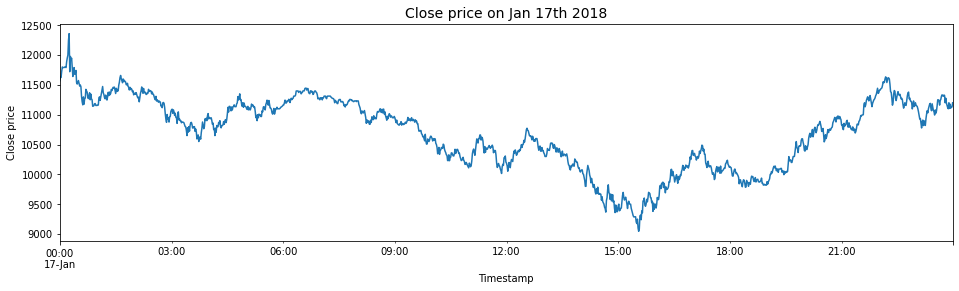

In [29]:
data.loc['Jan 17th 2018'].Close.plot(); 
plt.ylabel('Close price')
plt.title("Close price on Jan 17th 2018", size=14)
plt.show()

We can also select less specific date ranges. How's January? 

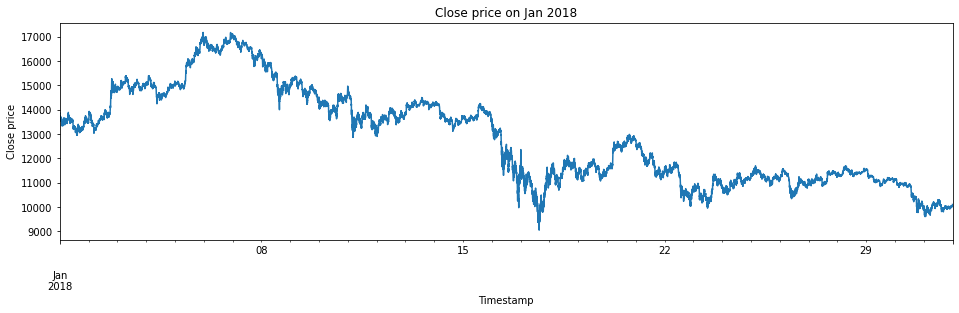

In [30]:
data.loc['Jan 2018'].Close.plot(); # <--- Pandas... is... awesome 
plt.ylabel('Close price')
plt.title('Close price on Jan 2018')
plt.show()

Let's see those days between the 15th and the 22nd. Let's select in a different way, for the sake of giggles. 

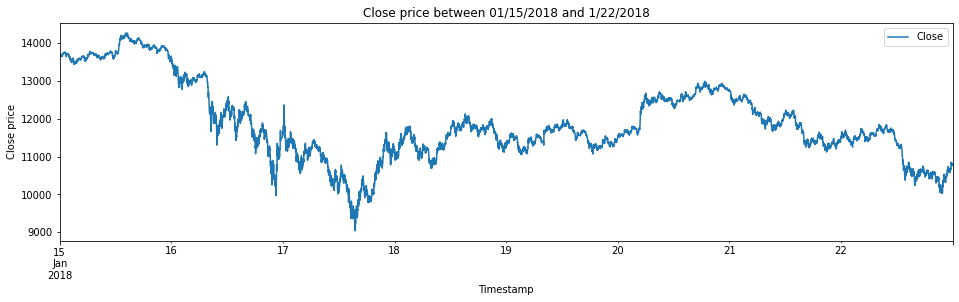

In [31]:
data.loc['01/15/2018':'01/22/2018'].Close.plot();  # <--- remember, American dates are less error prone in Pandas 
plt.ylabel('Close price')
plt.title('Close price between 01/15/2018 and 1/22/2018')
plt.legend();


Interesting. What were things like during that "drop"? From our first chart, we saw it was on the 17th, between 3PM and 4PM. Let's create a slice, so that we can access this interval without having to write every time.

In [32]:
interval = slice('01/17/2018 1:30PM','01/17/2018 4:30PM') # yep, minutes, seconds, up to nanoseconds actually! 

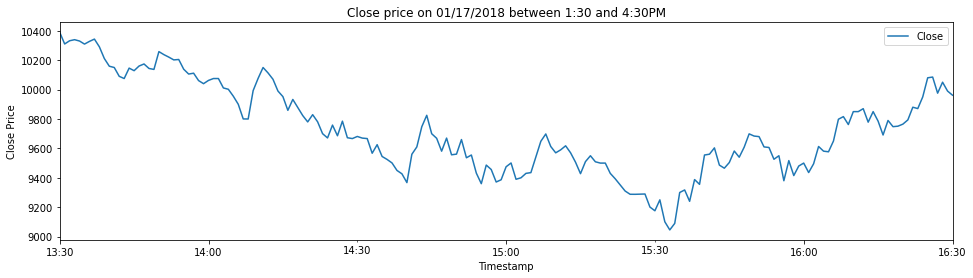

In [33]:
data.loc[interval].Close.plot();  
plt.ylabel('Close Price')
plt.title('Close price on 01/17/2018 between 1:30 and 4:30PM')
plt.legend();


How did traders react? Let's get the volume 

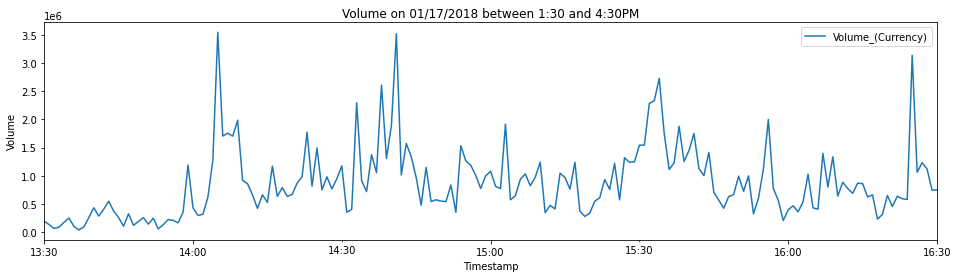

In [34]:
data.loc[interval]['Volume_(Currency)'].plot();
plt.ylabel('Volume')
plt.title('Volume on 01/17/2018 between 1:30 and 4:30PM')
plt.legend();


And here, we reach the limits of our dear Timestamps. Let's think about this objectively. We have been looking at prices of bitcoin for a point in time. The price on Jan 17th, at 3PM makes sense. But the volume "in that moment"? It's a bit non-sensical.
The volume should be the aggregated amount of bitcoin traded in a time interval.The interval is defined by either the start and end timestamps or the start timestamp and the duration. 
 Some datasets (this one probably included) will treat data as being "since the last timestamp until the current one", but real world data may have an ambiguous definition of the time interval . 

Counting using timestamps is like asking _how many people went into McDonnals at an exact moment_. Probably none. It doesn't tell us much. 

We think in terms of people "per minute", or "per hour". 

### Time Series Methods for data transformation and aggregation



So... Let's get our volume per minute! For this, we can use [resample](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwi3jfnKgNnaAhUGvBQKHRCwBd4QFggpMAA&url=https%3A%2F%2Fpandas.pydata.org%2Fpandas-docs%2Fstable%2Fgenerated%2Fpandas.DataFrame.resample.html&usg=AOvVaw1le9agxvLanaQp9zlNYG9Y)

In our case, we'll resample to every 5 minutes, and take the sum (because we want to sum the volume of those 5 minutes). 

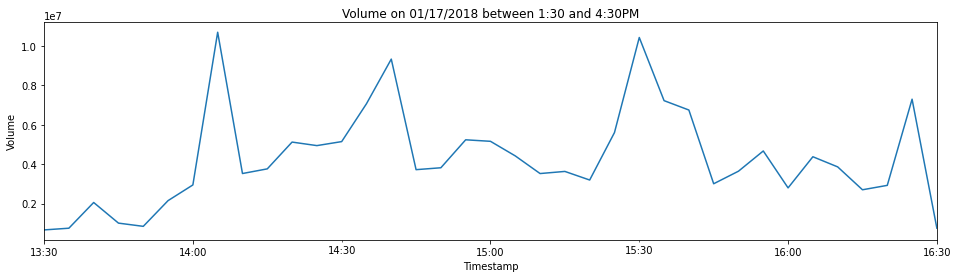

In [35]:
data.loc[interval]['Volume_(Currency)'].resample('5 min').sum().plot()
plt.ylabel('Volume')
plt.title('Volume on 01/17/2018 between 1:30 and 4:30PM')
plt.show()

Wow! How much money (in dollars) was traded in the largest 10 minutes peak?

In [36]:
money = data.loc[interval]['Volume_(Currency)'].resample('10 min').sum().max()

print('In 10 minutes, %0.1f dollars were traded in Bitcoin' % money)

In 10 minutes, 17657576.5 dollars were traded in Bitcoin


We just took the sum, but if we were looking at prices, would that make sense? Probably not, we would resample, and take the mean: 

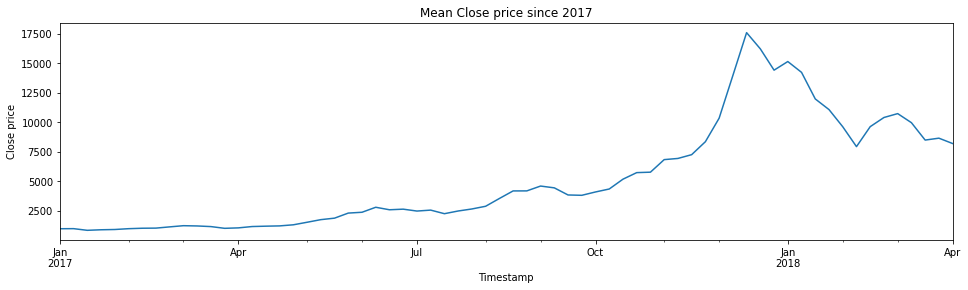

In [37]:
data.resample('W').Close.mean().plot();  # the mean weekly closing prices, since 2017
plt.ylabel('Close price')
plt.title('Mean Close price since 2017')
plt.show()

Time... is... cool. 

What if we wanted to know the total amount of money that has been traded in bitcoin? 

One way would simply be to sum it, but that doesn't give us any idea of how that total varied over time: 

In [38]:
data['Volume_(Currency)'].sum()

51301590508.0701

One cooler way to see this over time is to use the cumulative sum:

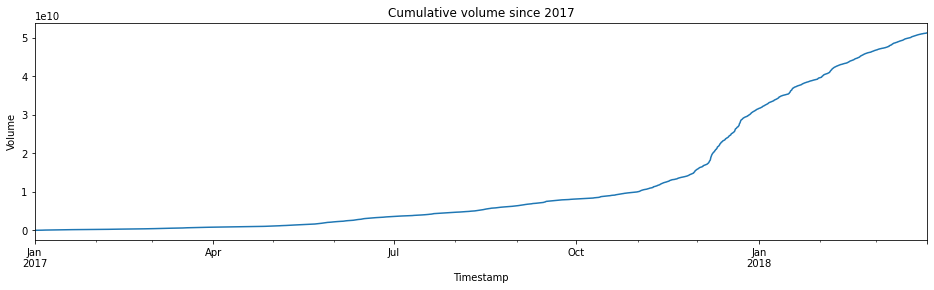

In [39]:
data['Volume_(Currency)'].cumsum().plot();  # the total volume traded since the start 
plt.ylabel('Volume')
plt.title('Cumulative volume since 2017')
plt.show()

As you've learnt before, there are many cool [methods for groupby](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html). 

Let's say we want to know "what was the record for total volume per day, over time?" Naturally the record can only go up, and will have some "steps". 

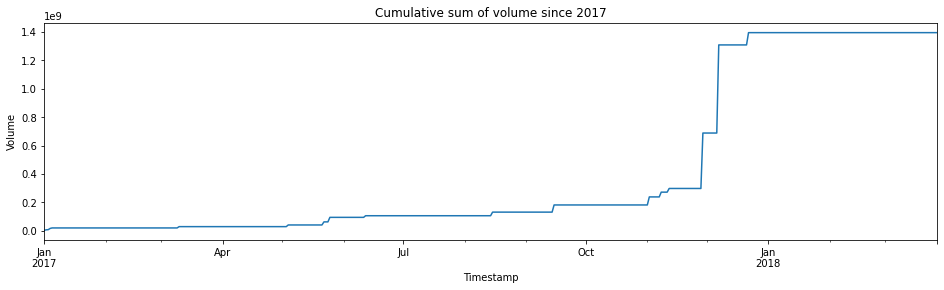

In [40]:
data['Volume_(Currency)'].resample('d').sum().cummax().plot(); 
plt.ylabel('Volume')
plt.title('Cumulative sum of volume since 2017')
plt.show()

A more important question however may be 
> " _what were the biggest variations in price?_ "

For this, we might find it useful to calculate consecutive differences between periods, using [diff](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.diff.html)

In [41]:
data.Close.diff().head()  # this can take a few seconds to run

Timestamp
2017-01-01 00:00:00     NaN
2017-01-01 00:01:00    0.00
2017-01-01 00:02:00    0.00
2017-01-01 00:03:00    0.01
2017-01-01 00:04:00    0.03
Name: Close, dtype: float64

The first entrance is NaN, which makes sense because it's got no previous day to subtract. 

What do the diffs look like? 

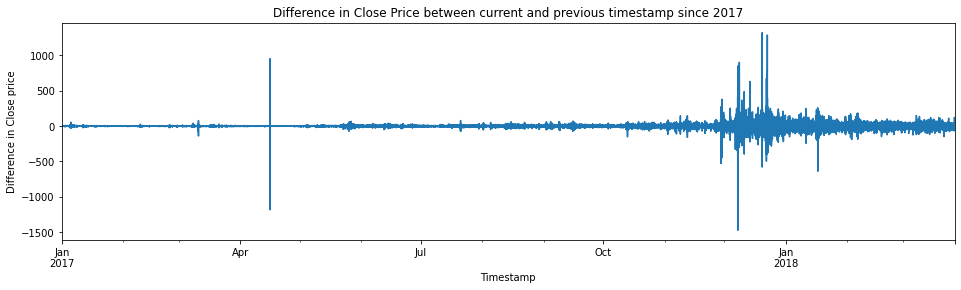

In [42]:
data.Close.diff().plot();
plt.ylabel('Difference in Close price')
plt.title('Difference in Close Price between current and previous timestamp since 2017')
plt.show()

Not particularly useful. How about on a particular day? 

Text(0, 0.5, 'Difference in Close price')

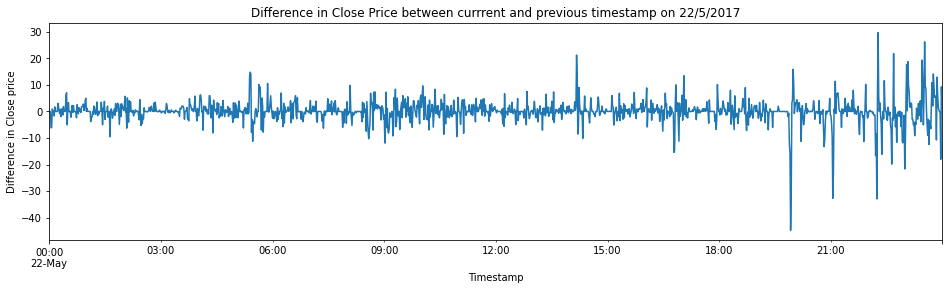

In [43]:
data.loc['May 22nd 2017'].Close.diff(periods=1).plot();
plt.title('Difference in Close Price between currrent and previous timestamp on 22/5/2017')
plt.ylabel('Difference in Close price')

Another useful method is [rolling windows](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html). They do what their name suggests: aggregate the previous X periods using a certain function, for instance the mean. They are very useful to smooth choppy timeseries and be less reactive to noise. 

We can choose to center the window (look back and forward), but in general, we only want to take into account information from the past, so we should use `center=False` (which is the default)

Let's say it's December 18th, in the early morning, and we are at our terminal. 

##### Midnight and a bit... 

Text(0, 0.5, 'Weighted Price')

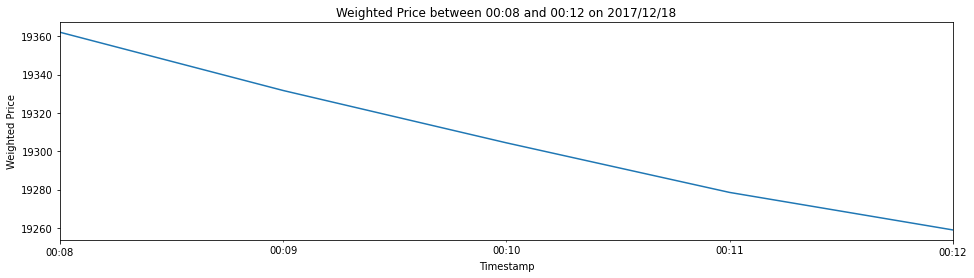

In [44]:
data.loc['Dec 18th 2017 00:08:00':'Dec 18th 2017 00:12:00', 'Weighted_Price'].plot();
plt.title('Weighted Price between 00:08 and 00:12 on 2017/12/18')
plt.ylabel('Weighted Price')

![](https://i.imgflip.com/29iucd.jpg)

##### A few minutes pass... 

Text(0, 0.5, 'Weighted Price')

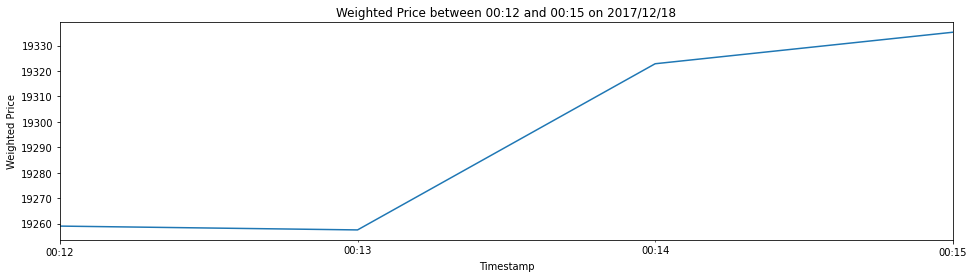

In [45]:
data.loc['Dec 18th 2017 00:12:00':'Dec 18th 2017 00:15:00', 'Weighted_Price'].plot();
plt.title('Weighted Price between 00:12 and 00:15 on 2017/12/18')
plt.ylabel('Weighted Price')

![](https://i.redditmedia.com/VE5dgdjQ8FKZ47gdxJdQ07q36bsZVyhvAmllvLdtTnI.jpg?w=534&s=ce869cd0d8630cd420af7fa72b3c296d)

##### A few more minutes... 

Text(0, 0.5, 'Weighted Price')

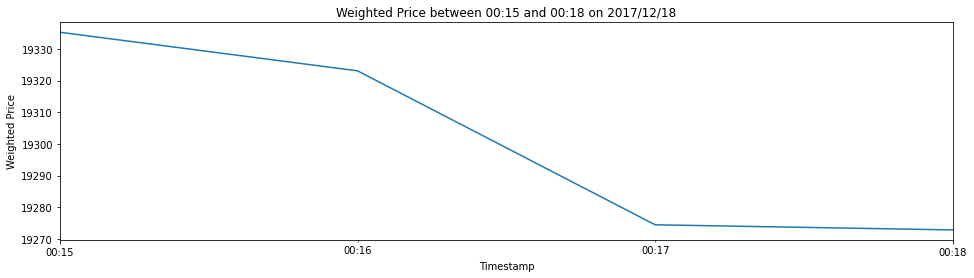

In [46]:
data.loc['Dec 18th 2017 00:15:00':'Dec 18th 2017 00:18:00', 'Weighted_Price'].plot();
plt.title('Weighted Price between 00:15 and 00:18 on 2017/12/18')
plt.ylabel('Weighted Price')

![](https://i.imgflip.com/29iucd.jpg)

I think you get the picture. What's going on is that we're being extremely reactive to noise, and missing the underlying process. What is in fact going on is that we are in a free-fall, but it might not be obvious unless we look at the slightly broader picture. 

In other words, assuming there is an underlying process, we can assume the recent past should carry some weight. How much weight? A rolling [window](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html) of weight! 

#### The first hour of Dec 18th 2017, as seen by traders

Text(0, 0.5, 'Weighted Price')

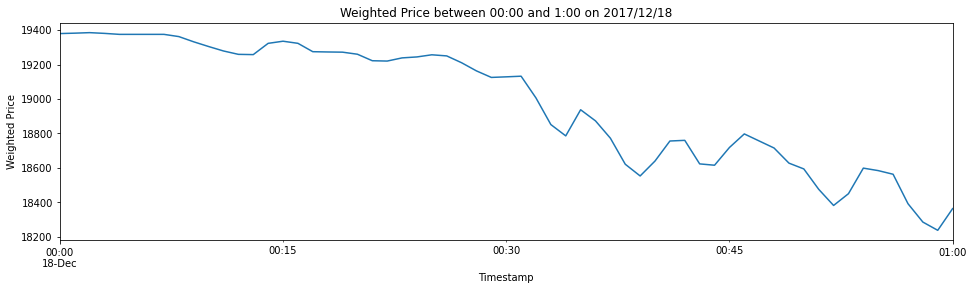

In [47]:
data.loc['Dec 18th 2017 00:00:00':'Dec 18th 2017 01:00:00', 'Weighted_Price'].plot();
plt.title('Weighted Price between 00:00 and 1:00 on 2017/12/18')
plt.ylabel('Weighted Price')

#### The first hour of Dec 18th 2017, as seen by a rolling window of 10 minutes

In [48]:
# this is just the raw data, so we can apply a rolling window on it  
first_hour = data.loc['Dec 18th 2017 00:00:00':'Dec 18th 2017 01:00:00', 'Weighted_Price']

# notice the window size as a parameter of rolling, feel free to mess around with that parameter 
# and the center set to False. That's because we don't want to use data from the future! 
# Also notice how we use the mean. We can use many others. Try changing it! 
window_size = 10 
first_hour_rolling_window = first_hour.rolling(window=window_size, center=False).mean()

What do these look like? 

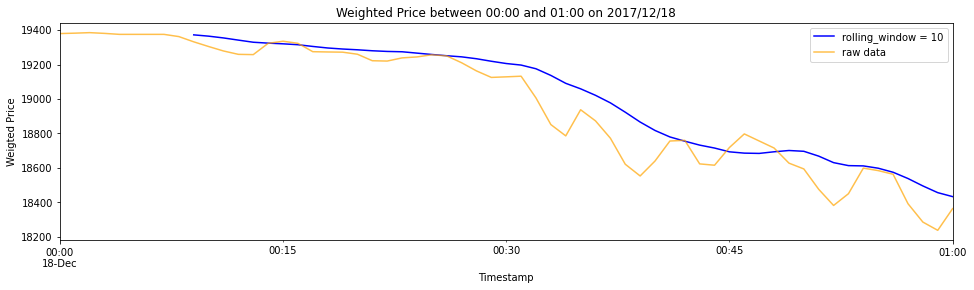

In [49]:
# Let's plot these together 
first_hour_rolling_window.plot(color='b', label='rolling_window = %0.0f' % window_size);
first_hour.plot(label='raw data', alpha=.7, ls='-', color='orange');
plt.ylabel('Weigted Price')
plt.title('Weighted Price between 00:00 and 01:00 on 2017/12/18')
plt.legend();
plt.show()




As you can see, the rolling mean appears as a smoother version of the original signal, this can be a great help when looking at noisy signals and you just want to get an idea of the overall trend. Also note that when doing the rolling mean you get a delayed version of the original signal, due to the nature of how it is calculated.

( _Note: In case you are curious about what would have happened if you had interpreted the yellow line as a potential recovery... It doesn't end well._ )

 Both rolling windows and resampling methods transform timeseries. If you still have doubts about the difference between them consult section 'Time-aware rolling vs. resampling' of [pandas computation](https://pandas.pydata.org/pandas-docs/version/1.1.5/user_guide/computation.html).

### Let's ask some more questions of this dataset! 

Back to the entire  dataset. Let's answer the following question:
> What was the weekly change in price, over time? 

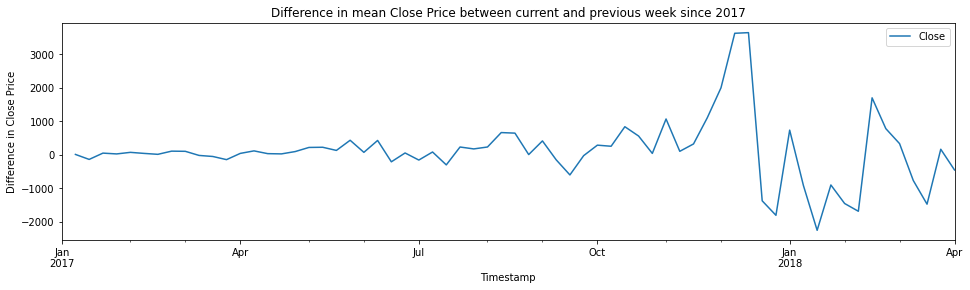

In [50]:
# resample to weekly, get the mean Close price (per week), calculate the differences, and plot them 
data.resample('W').Close.mean().diff(periods=1).plot();
plt.ylabel('Difference in Close Price')
plt.title('Difference in mean Close Price between current and previous week since 2017')
plt.legend();



We are observing something that makes sense. As the magnitude gets bigger, so does the volatility. It makes more sense for bitcoin to go down \\$100 in a week when it was \\$5000 than when it was at \\$20. 

What we actually want... is the percent change. 

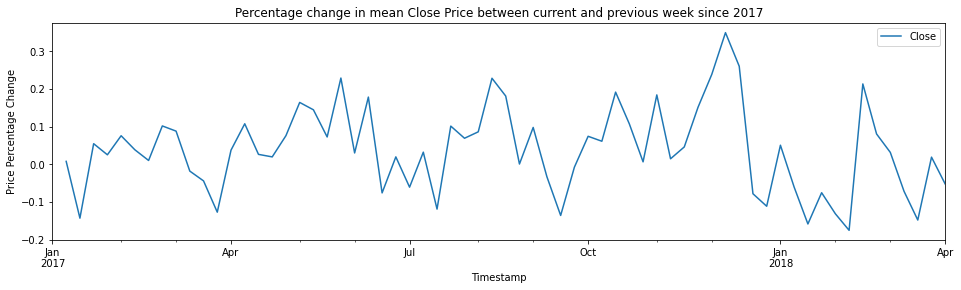

In [51]:
# resample to weekly, take the mean close price (weekly), and calculate the percentage change 
data.resample('W').Close.mean().pct_change().plot();
plt.ylabel('Price Percentage Change')
plt.title('Percentage change in mean Close Price between current and previous week since 2017')
plt.legend();


Interestingly enough, this chart seems to tell us that while bitcoin varies a lot, it is relatively consistent, with weekly variations of +/- 30% being as big as it gets. As the magnitude becoming larger it becomes more newsworthy " _up one thousand dollars!!!_ ", but the underlying percent change doesn't seem so radically altered. 

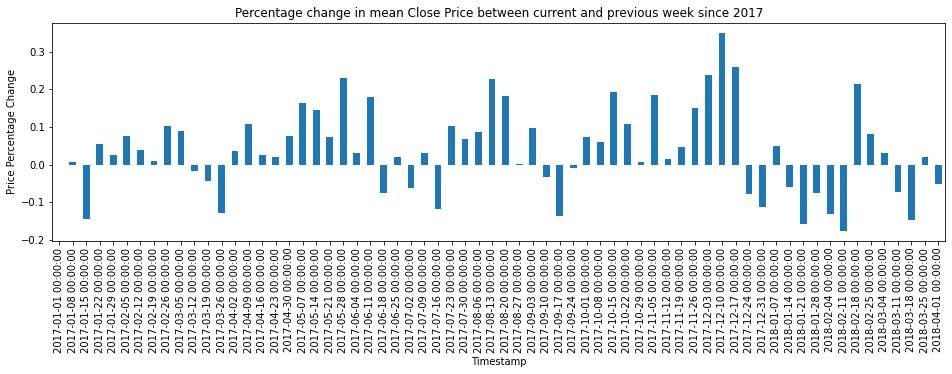

In [52]:
data.resample('W').Close.mean().pct_change().plot(kind='bar');
plt.ylabel('Price Percentage Change')
plt.title('Percentage change in mean Close Price between current and previous week since 2017')
plt.show()

Wow that is one ugly X axis. Unfortunately this is a [known issue](https://stackoverflow.com/questions/19143857/pandas-bar-plot-xtick-frequency?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa) with Pandas, and when it happens, it requires a bit of copy-pasting around to fix. 

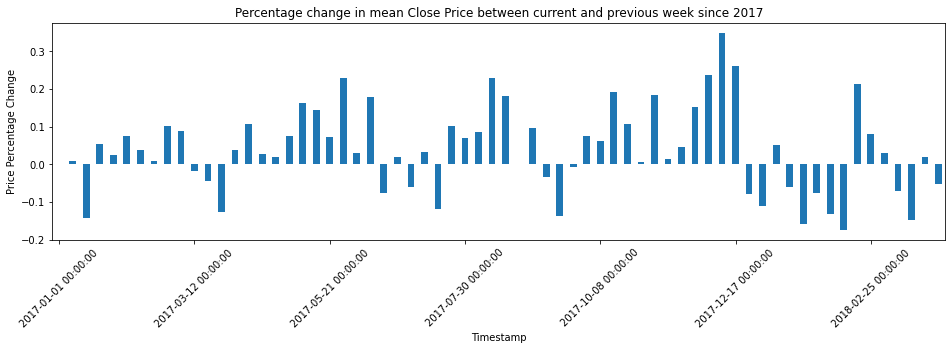

In [53]:
# our actual chart 
ax = data.resample('W').Close.mean().pct_change().plot(kind='bar', rot=45);

# this fixes the axis. 
# I wouldn't spend too much time in this horrible Matplotlib code, just know it exists. 

n = 10
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]  # <---- blearghk!!
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])
plt.ylabel('Price Percentage Change')
plt.title('Percentage change in mean Close Price between current and previous week since 2017')
plt.show()

Fun pattern, huh? Growth seems to bring more growth, and then crashes quite spectacularly, and the cycle re-starts. 

### Missing Data

In the previous specialization, you've heard about the problems of missing data, and you guessed it right, for time series this may even be a more important problem. Given that in time series consecutive samples are dependent on each other, having missing periods may have a snowball effect. For example, you may be dependent on the current timestamp to predict the next one. If you're missing today's value, it will be hard to predict tomorrow's.

Let's see if we have any missing data in our dataset:

In [54]:
data.isnull().sum()

Open                   0
High                   0
Low                  501
Close                  0
Volume_(BTC)           0
Volume_(Currency)      0
Weighted_Price         0
dtype: int64

It seems like we're missing some values on the Low column! Let's take a closer look:

In [55]:
data.loc[data.isnull().Low]

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2018-03-11 00:40:00,8575.00,8585.41,NaN,8585.39,8.598534,73739.326430,8575.802287
2018-03-11 00:41:00,8585.37,8585.37,NaN,8585.29,10.371254,89010.185198,8582.394026
2018-03-11 00:42:00,8585.29,8585.30,NaN,8576.76,24.168574,207258.015880,8575.516778
2018-03-11 00:43:00,8576.79,8577.01,NaN,8576.99,6.991539,59964.644966,8576.744208
2018-03-11 00:44:00,8577.00,8577.01,NaN,8577.00,8.246685,70731.848454,8577.004086
...,...,...,...,...,...,...,...
2018-03-11 08:56:00,8768.91,8789.00,NaN,8789.00,5.820335,51063.997779,8773.377482
2018-03-11 08:57:00,8789.00,8789.00,NaN,8788.99,1.022405,8985.918467,8788.999182
2018-03-11 08:58:00,8789.00,8789.00,NaN,8788.99,0.411423,3615.998568,8788.999086


Let's also look at the plot

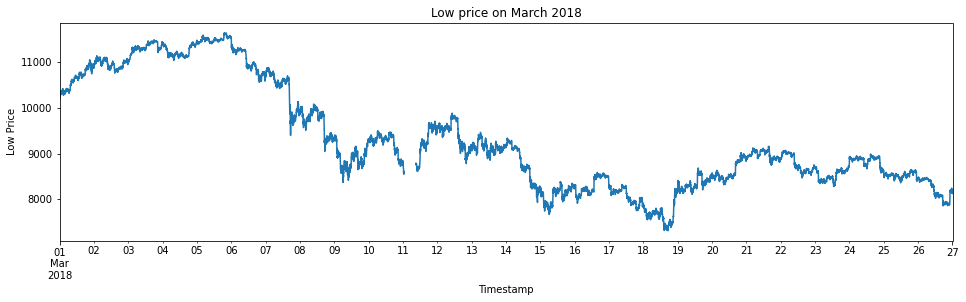

In [56]:
data.loc['2018-03'].Low.plot()
plt.ylabel('Low Price')
plt.title('Low price on March 2018')

plt.show()

So the ways to solve this will be highly dependent on your particular problem. The simplest solution, is to use forward fill. Basically, this just fills the missing values using the last existing value. This method makes strong assumptions that won't probably make sense to most datasets, and you may indeed be adding noise to your data. 

But for example, there are industrial signals that work on-change. This means that they only register values when the measure changes, all the rest are NaNs, in this cases using forward filling is the appropriate approach.

In [57]:
interval = slice('2018-03-10','2018-03-11')

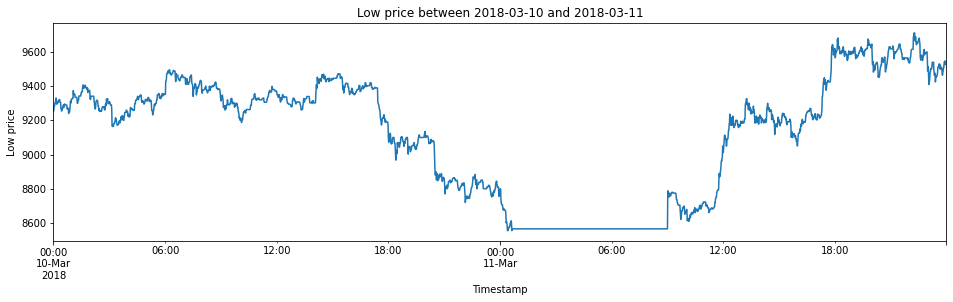

In [58]:
data.loc[interval].Low.fillna(method='ffill').plot()
plt.ylabel('Low price')
plt.title('Low price between 2018-03-10 and 2018-03-11')
plt.show()

For this particular case, slightly better than the forward filling could be using a simple linear interpolation:

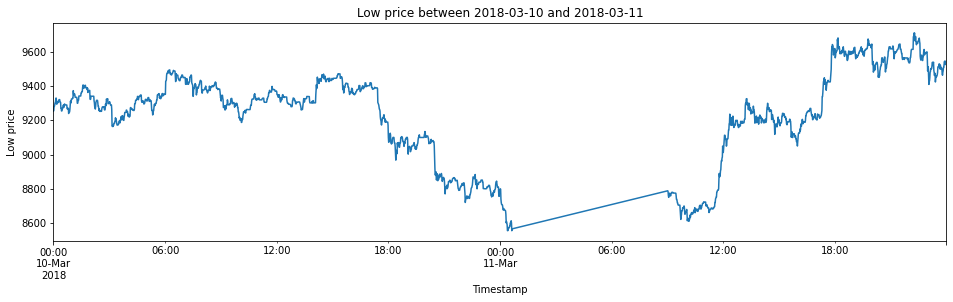

In [59]:
data.loc[interval].Low.interpolate().plot()
plt.ylabel('Low price')
plt.title('Low price between 2018-03-10 and 2018-03-11')
plt.show()

But in our case we have a multivariate time series. This means that we should be able to take advantage of the relationship between the several variables to estimate the missing data. For that we can use sklearn's KNNImputer which is normally a simple yet elegant way to solve the problem when we don't really have domain knowledge to do anything better:

In [60]:
from sklearn.impute import KNNImputer
imputer = KNNImputer() # To obtain better results we may want to have more neighbors, of course that in a real setting
                       # this is a parameter that should be tunned
    
data_imputed = imputer.fit_transform(data) # This may take a bit to run
df_imputed = pd.DataFrame(data_imputed, index=data.index, columns=data.columns)

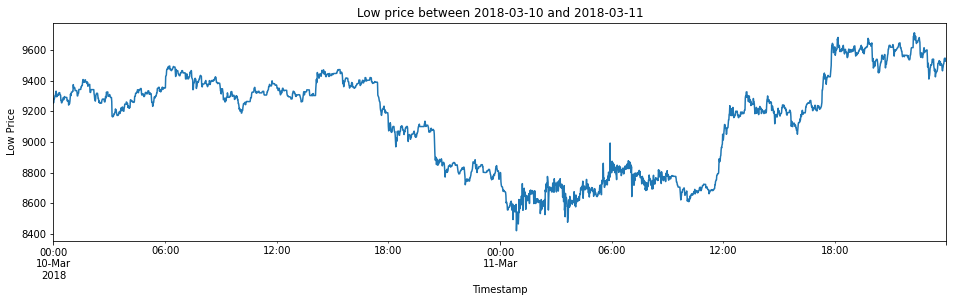

In [61]:
df_imputed.loc[interval].Low.interpolate().plot()
plt.ylabel('Low Price')
plt.title('Low price between 2018-03-10 and 2018-03-11')
plt.show()

Well at least it looks a bit more like the rest of the data! Again, here the idea is to introduce you to some possible methods you may want to use in the future, but as in all cases, missing data imputation is highly specific. Do remember that when using KNN imputation in a real scenario you would have to fit the transformer on a training set and then do the transformations in the validation and test sets.

Great, we've covered a number of methods for dealing with Timeseries. 

Next up, we go and try to examine the full stock market. Only to find, to our dismay, that we need multi-indexing. [What is multi-indexing, I hear you ask?](https://www.youtube.com/watch?v=gC24hhNbXN0)
#### Move on to the Part 2 of 3 of BLU04 to find out! 

----

### **Summary of the methods we have learnt in this unit:**
* `pd.to_datetime()` - this allows you to create datetime format and gives you access to several methods that pandas has specifically to handle dates 
* We need to have a datetime sorted index!!
* Selection: `dataframe.loc['Jan 17th 2018]` to select the 17th of January, 2018 
    * Remember pandas is really helpful here as you can even do something like `dataframe.loc['Jan 2018']` or even ranges `dataframe.loc['01/15/2018':'01/22/2018']`
    * If you're going to analyse the same interval several times, then using slice() can help a lot.
*  How to resample, e.g: `.resample('5min').sum()`. Don't forget that after resampling we need an aggregation function! 
    * few new aggregation functions that we've talked: 
        * `cumsum()`
        * `cummax()`
* We have also learnt how to calculate the difference between periods, using `diff()`
* Rolling windows: `.rolling()` that allows us to specify the rolling window size and the aggregation function.